In [0]:
!pip install PyDrive

In [0]:
!ls

In [0]:

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1kfUcDYHPdGkOyfhsYO2xPYQ9THStwdZu'})
download.GetContentFile('102623729836648532953-raw-reply-pairs.pkl')

In [0]:
download = drive.CreateFile({'id': '1V-ogRtNQ9xr5JglcPw-zAjp-O7mjzEva'})
download.GetContentFile('108371130441830548619-raw-reply-pairs.pkl')

In [0]:
import tensorflow as tf
import numpy as np
import pickle
import re
from collections import Counter
import string
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:

with open('102623729836648532953-raw-reply-pairs.pkl', 'rb') as f:
    data_102 = pickle.load(f)
with open('108371130441830548619-raw-reply-pairs.pkl', 'rb') as f:
    data_108 = pickle.load(f)


In [11]:
print('Number of records in 102:', len(data_102))
print('Number of records in 108:', len(data_108))
email_data=data_102

Number of records in 102: 856
Number of records in 108: 1969


In [12]:
i=np.random.random_integers(len(email_data)-1)
print(i)
print(email_data[i][0]['message_core_body_sentences'])
print(email_data[i][1]['message_core_body_sentences'])

840
["I noticed that you didn't go online during your assigned hours.", 'According to the instructions, you had to click the "Point" button on the top-right corner of the screen and click "Go Online" in order to receive new messages.', 'There were approximately 30 emails that were lost in this time.', "Please make sure this doesn't happen during your assigned time slots tomorrow.", 'Thanks, PERSON_NAME *__**__**__**__**__**__**__**__**__**__**__**__* *PERSON_NAME* *CTO and co-founder of Point.', '<https://pointmail.io/>LOCATION Class of 2017*']
['We meant to say that you must be logged out of your other accounts (i.e. personal Gmail), then you can log into your Point operator account to install the extension.', 'Sorry if that wasn’t clear!', 'you shouldn’t have to be in incognito to install it.', 'Not sure how that made it into the instructions.', 'For any emails that don’t need a reply (such as marketing emails), you should just mark them as read.', 'Sorry again for the confusing inst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 855 + 1) instead
  """Entry point for launching an IPython kernel.


In [0]:
import requests
import json
import numpy as np


def _chunks(collection, chunk_size):
    chunk_size = max(1, chunk_size)
    return (collection[i:i + chunk_size] for i in range(0, len(collection), chunk_size))


class USEClient(object):
    def __init__(self, base_url="https://sentence-encoder.pointapi.com"):
        """ Create a new Universal Sentence Encoder Client
        :param base_url: the base URL of the server
        """
        self.endpoint = base_url + '/v1/models/USE:predict'

    def encode_text(self, text):
        """ Encode a piece of text.
        :param text: some text (str)
        :return: a np.array of shape (512,)
        """
        body = {"instances": [text]}
        r = requests.post(self.endpoint, data=json.dumps(body))
        return np.array(r.json()['predictions'][0])

    def encode_texts(self, texts, batch_size=1000):
        """ Encode a piece of text.
        Note: Requests will be sent in batches of maximum 1000 (`batch_size`)
        sentences per batch to avoid `413 Request Entity Too Large` error.
        :param texts: some texts ([str, ...])
        :param batch_size: how many sentences to put in a single request
        :return: a np.array of shape (?, 512)
        """
        results = []
        for batch in _chunks(texts, batch_size):
            body = {"instances": batch}
            r = requests.post(self.endpoint, data=json.dumps(body))
            results.append(np.array(r.json()['predictions']))

        return np.concatenate(results)

    def sentence_similarity(self, s0, s1):
        """ Compute sentence similarity
        :param s0: a sentence (str)
        :param s1: a sentence (str)
        :return: a float in range [0,1]
        """
        v0 = np.array(self.encode_text(s0))
        v1 = np.array(self.encode_text(s1))

        return np.dot(v0, v1) / (np.sqrt(v0.dot(v0)) * np.sqrt(v1.dot(v1)))
client = USEClient(base_url="https://sentence-encoder.pointapi.com")
sentences = ["Hello!", "How do you do?"]
encodings=client.encode_texts(sentences)


In [0]:
def count_letters(input_string, valid_letters=string.ascii_letters):
    count = Counter(input_string) 
    return sum(count[letter] for letter in valid_letters)
email_response=[[] for i in range(len(email_data))]
for i in range(len(email_data)):
  if (len(email_data[i][0]['message_core_body_sentences'])!=0):
    string_list=[re.sub('[#*<>?-]','',each_sent) for each_sent in email_data[i][0]['message_core_body_sentences']]
    pruned_str_list=[]    
    for each_sent in string_list:         
      each_sent=' '.join(each_sent.split())
      if ('thank' not in each_sent.lower()) and ('sincere' not in each_sent.lower()) and (count_letters(each_sent.lower())>3):
        pruned_str_list.append(each_sent)                        
    email_response[i]=pruned_str_list

In [16]:
i=np.random.random_integers(len(email_data)-1)
print(email_response[i])
print(email_data[i][0]['message_core_body_sentences'])

['Senior year and the baseball season have been going very smoothly so far.', 'And yes, I am a bit disappointed by the WL news.', 'Fortunately, I was admitted by LOCATION via early action and am leaning towards going there, unless LOCATION changes its mind soon.', "Since I have time to decide and still feel that LOCATION is a great fit for me, I believe I'll wait it out for a while and see if a spot could be freed.", 'I hope all is going well for you, Mr. PERSON_NAME!']
['Senior year and the baseball season have been going very smoothly so far.', 'And yes, I am a bit disappointed by the WL news.', 'Fortunately, I was admitted by LOCATION via early action and am leaning towards going there, unless LOCATION changes its mind soon.', "Since I have time to decide and still feel that LOCATION is a great fit for me, I believe I'll wait it out for a while and see if a spot could be freed.", 'I hope all is going well for you, Mr. PERSON_NAME!']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 855 + 1) instead
  """Entry point for launching an IPython kernel.


In [0]:
email_response_embeddings=[[] for i in range(len(email_response))]
for i in range(len(email_response)):
  if (len(email_response[i])!=0):
    email_response_embeddings[i]=client.encode_texts(email_response[i])

In [0]:
response_phrase_embedding=[]
response_phrase_indexing=[]
for i in range(len(email_response_embeddings)):
  if (len(email_response_embeddings[i])!=0):
    for j in range(len(email_response_embeddings[i])):
      response_phrase_embedding.append(email_response_embeddings[i][j])
      response_phrase_indexing.append([i,j])

In [19]:
print(len(response_phrase_embedding))
print(len(response_phrase_indexing))
response_phrase_indexing[23]

5465
5465


[4, 3]

In [0]:
response_phrase_distance_matrix=np.zeros((len(response_phrase_embedding),len(response_phrase_embedding)))
for i in range(len(response_phrase_embedding)):
  for j in range(i+1,len(response_phrase_embedding)):
    response_phrase_distance_matrix[i][j]=np.linalg.norm(response_phrase_embedding[i]-response_phrase_embedding[j])

In [0]:
response_phrase_distance_vector=np.reshape(response_phrase_distance_matrix,len(response_phrase_embedding)*len(response_phrase_embedding))

In [90]:
distance_threshold=0.1
number_of_similar_phrases=np.sum(response_phrase_distance_vector<distance_threshold)-(response_phrase_distance_vector.shape[0]-len(response_phrase_embedding))/2+len(response_phrase_embedding)
print('number_of_similar_phrases for threshold ', distance_threshold,':', number_of_similar_phrases)
distance_threshold=0.2
number_of_similar_phrases=np.sum(response_phrase_distance_vector<distance_threshold)-(response_phrase_distance_vector.shape[0]-len(response_phrase_embedding))/2+len(response_phrase_embedding)
print('number_of_similar_phrases for threshold ', distance_threshold,':', number_of_similar_phrases)
distance_threshold=0.4
number_of_similar_phrases=np.sum(response_phrase_distance_vector<distance_threshold)-(response_phrase_distance_vector.shape[0]-len(response_phrase_embedding))/2+len(response_phrase_embedding)
print('number_of_similar_phrases for threshold ', distance_threshold,':', number_of_similar_phrases)

number_of_similar_phrases for threshold  0.1 : 16886.0
number_of_similar_phrases for threshold  0.2 : 16982.0
number_of_similar_phrases for threshold  0.4 : 17748.0


(5465, 1)


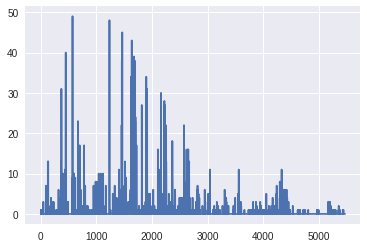

In [91]:
distance_threshold=0.4
response_phrase_distance_cluster=[]
response_phrase_distance_score=np.sum(np.logical_and((response_phrase_distance_matrix<distance_threshold),(response_phrase_distance_matrix>0)),axis=1,keepdims=True)
print(response_phrase_distance_score.shape)
plt.plot(response_phrase_distance_score) 
plt.show()

In [92]:
thres_freq=10
top_response_phrases_distance_index=np.where(response_phrase_distance_score>thres_freq)[0]
#print(top_response_phrases_index)
for i in range(len(top_response_phrases_distance_index)):
  k,l=response_phrase_indexing[top_response_phrases_distance_index[i]]
  print(email_response[k][l])


Resume_Draft.pdf
Resume_Draft.pdf
PERSON_NAME School Counselor LOCATION LOCATION PHONE_NUMBER PHONE_NUMBER (fax)
PERSON_NAME School Counselor LOCATION LOCATION PHONE_NUMBER PHONE_NUMBER (fax)
________________________ PERSON_NAME CTO and cofounder of Point.
https://pointmail.io/LOCATION Class of 2017
Dr. PERSON_NAME
Upload jokes, photos and more.
It's free!
http://g.msn.com/8HMBENUS/2755PS=47575
________________________ PERSON_NAME CTO and cofounder of Point.
https://pointmail.io/LOCATION Class of 2017
https://pointmail.io/LOCATION Class of 2017
PERSON_NAME
PERSON_NAME.
________________________ PERSON_NAME CTO and cofounder of Point.
https://pointmail.io/LOCATION Class of 2017
Mr. PERSON_NAME PERSON_NAME School Counselor LOCATION LOCATION PHONE_NUMBER PHONE_NUMBER (fax)
https://pointmail.io/LOCATION Class of 2017
Best, PERSON_NAME ________________________ PERSON_NAME CTO and cofounder of Point.
https://pointmail.io/LOCATION Class of 2017
https://pointmail.io/LOCATION Class of 2017
_____

In [0]:
response_phrase_dotproduct_matrix=np.zeros((len(response_phrase_embedding),len(response_phrase_embedding)))
for i in range(len(response_phrase_embedding)):
  for j in range(i+1,len(response_phrase_embedding)):
    response_phrase_dotproduct_matrix[i][j]=np.dot(response_phrase_embedding[i],response_phrase_embedding[j])
    
response_phrase_dotproduct_vector=np.reshape(response_phrase_dotproduct_matrix,len(response_phrase_embedding)*len(response_phrase_embedding))    

In [21]:
dot_threshold=0.7
number_of_similar_phrases=np.sum(response_phrase_dotproduct_vector>dot_threshold)
print('number_of_similar_phrases for threshold ', dot_threshold,':', number_of_similar_phrases)
dot_threshold=0.8
number_of_similar_phrases=np.sum(response_phrase_dotproduct_vector>dot_threshold)
print('number_of_similar_phrases for threshold ', dot_threshold,':', number_of_similar_phrases)
dot_threshold=0.9
number_of_similar_phrases=np.sum(response_phrase_dotproduct_vector>dot_threshold)
print('number_of_similar_phrases for threshold ', dot_threshold,':', number_of_similar_phrases)

number_of_similar_phrases for threshold  0.7 : 24635
number_of_similar_phrases for threshold  0.8 : 10710
number_of_similar_phrases for threshold  0.9 : 7493


(5465, 1)


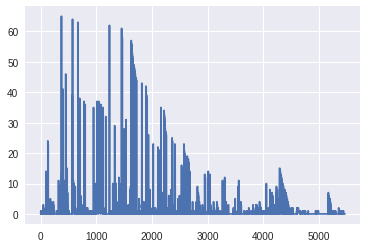

In [22]:
dot_threshold=0.9
response_phrase_cluster=[]
response_phrase_dotproduct_score=np.sum((response_phrase_dotproduct_matrix>dot_threshold),axis=1,keepdims=True)
print(response_phrase_dotproduct_score.shape)
plt.plot(response_phrase_dotproduct_score) 
plt.show()

In [66]:
unique_response_phrases_dotproduct=[]
thres_freq=10
top_response_phrases_dotprod_index=np.where(response_phrase_dotproduct_score>thres_freq)[0]
#print(top_response_phrases_index)
for i in range(len(top_response_phrases_dotprod_index)):
  k,l=response_phrase_indexing[top_response_phrases_dotprod_index[i]]
  unique_response_phrases_dotproduct.append(email_response[k][l])
  print(email_response[k][l])
  

Dr. PERSON_NAME
Dr. PERSON_NAME
Dr. PERSON_NAME
Resume_Draft.pdf
Resume_Draft.pdf
No problem.
PERSON_NAME School Counselor LOCATION LOCATION PHONE_NUMBER PHONE_NUMBER (fax)
PERSON_NAME School Counselor LOCATION LOCATION PHONE_NUMBER PHONE_NUMBER (fax)
________________________ PERSON_NAME CTO and cofounder of Point.
https://pointmail.io/LOCATION Class of 2017
PERSON_NAME
Dr. PERSON_NAME
Upload jokes, photos and more.
It's free!
http://g.msn.com/8HMBENUS/2755PS=47575
Abdale
PERSON_NAME
________________________ PERSON_NAME CTO and cofounder of Point.
https://pointmail.io/LOCATION Class of 2017
PERSON_NAME ________________________________ With MSN Spaces email straight to your blog.
Upload jokes, photos and more.
It's free!
https://pointmail.io/LOCATION Class of 2017
PERSON_NAME
PERSON_NAME.
PERSON_NAME
PERSON_NAME
http://g.msn.com/8HMAENUS/2731PS=47575
http://g.msn.com/8HMAENUS/2749PS=47575
http://g.msn.com/8HMAENUS/2749PS=47575
http://g.msn.com/8HMAENUS/2749PS=47575
http://g.msn.com/8HMA

In [68]:
print('Number of top response phrases through dot product metric before consolidation:',len(top_response_phrases_dotprod_index))
unique_response_phrases_dotproduct=list(set(unique_response_phrases_dotproduct))
print('Number of top response phrases through dot product metric after consolidation:',len(unique_response_phrases_dotproduct))
print(unique_response_phrases_dotproduct)

Number of top response phrases through dot product metric: 184
Number of top response phrases through dot product metric: 36
["If so, you'll be very pleased to know that we are actually running A LOT of events...", 'Upload jokes, photos and more.', 'and YOU will be required to help us with them!', 'image.png', 'The Point Team ________________________ PERSON_NAME CTO and cofounder of Point.', 'Abdale', 'Also, please let us know if you are also interested in being a committee head.', 'Dr. PERSON_NAME', "Remember that you have to sign up or you'll risk being placed on probation.", '//hangouts.google.com/call/bxBmnWWzOp1_KsOVfkIaAAEE ________________________ PERSON_NAME CTO and cofounder of Point.', 'Are you bored of doing nothing for us', '//www.youtube.com/watchv=5lY019KgP4E', 'PERSON_NAME.', 'PERSON_NAME ________________________ PERSON_NAME CTO and cofounder of Point.', 'http://g.msn.com/8HMBENUS/2755PS=47575', 'No problem.', 'PERSON_NAME School Counselor LOCATION LOCATION PHONE_NUMBER 

In [0]:
print('Number of top response phrases through distance metric:',len(top_response_phrases_distance_index))


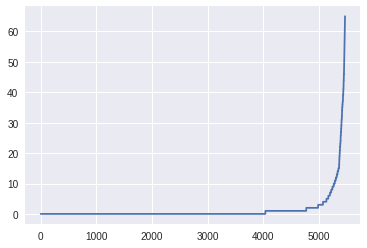

[ 373  572  669 ... 2127 2133 5464]


In [25]:
response_phrase_dotproduct_sorted_idx = np.argsort(-response_phrase_dotproduct_score.flatten())
plt.plot(np.sort(response_phrase_dotproduct_score.flatten())) 
plt.show()
print(response_phrase_dotproduct_sorted_idx)

In [26]:
len(response_phrase_embedding)

5465

In [0]:
unique_response_phrases_dotproduct=[]
unique_response_phrases_dotproduct_index=[[]]
unique_response_phrases_dotproduct.append(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[0]])
unique_response_phrases_dotproduct_index[0].append(response_phrase_dotproduct_sorted_idx[0])

for i in range(1,len(response_phrase_embedding)):
  #print('I:',i)
  #print('Length:',len(unique_response_phrases_dotproduct))
  dot_dist=[]
  for j in range(len(unique_response_phrases_dotproduct)):  
    dot_dist.append(np.dot(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]],unique_response_phrases_dotproduct[j]))
  min_dot_dist_index=np.argmin(dot_dist)
  min_dot_dist=dot_dist[min_dot_dist_index]
  if (min_dot_dist>dot_threshold):
    #print('In if')
    unique_response_phrases_dotproduct[min_dot_dist_index]=(unique_response_phrases_dotproduct[min_dot_dist_index]+response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]])/2
    unique_response_phrases_dotproduct_index[min_dot_dist_index].append(response_phrase_dotproduct_sorted_idx[i])
  else:
    #print('In else')
    unique_response_phrases_dotproduct.append(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]])
    unique_response_phrases_dotproduct_index.append([response_phrase_dotproduct_sorted_idx[i]])

In [65]:
print(len(unique_response_phrases_dotproduct_index))
for i in range(len(unique_response_phrases_dotproduct_index)):
  print(len(unique_response_phrases_dotproduct_index[i]))

5446
20
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [0]:
unique_response_phrases_dotproduct=defaultdict(lambda:[])
unique_response_phrases_dotproduct_index=defaultdict(lambda:[])
unique_length=0;
unique_response_phrases_dotproduct[unique_length]=response_phrase_embedding[response_phrase_dotproduct_sorted_idx[0]]
unique_response_phrases_dotproduct_index[unique_length]=[response_phrase_dotproduct_sorted_idx[0]]
unique_length=unique_length+1
for i in range(1,50):
  print('I:',i)
  print('Length:',len(unique_response_phrases_dotproduct))
  for j in range(len(unique_response_phrases_dotproduct)):    
    if (np.dot(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]],unique_response_phrases_dotproduct[j])>.8):
      #print('In if')
      #unique_response_phrases_dotproduct[j]=(unique_response_phrases_dotproduct[j]+response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]])/2
      unique_response_phrases_dotproduct_index[j].append(response_phrase_dotproduct_sorted_idx[i])
    else:
      #print('In else')
      unique_response_phrases_dotproduct[unique_length]=response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]]
      unique_response_phrases_dotproduct_index[unique_length]=[response_phrase_dotproduct_sorted_idx[i]]
      unique_length=unique_length+1

In [0]:
#This is a very naive way of clustering the sentence embeddings
unique_response_phrases_dotproduct=[]
unique_response_phrases_dotproduct_index=[[]]
unique_response_phrases_dotproduct.append(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[0]])
unique_response_phrases_dotproduct_index[0].append(response_phrase_dotproduct_sorted_idx[0])

for i in range(1,35):
  print('I:',i)
  print('Length:',len(unique_response_phrases_dotproduct))
  for j in range(len(unique_response_phrases_dotproduct)):    
    if (np.dot(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]],unique_response_phrases_dotproduct[j])>.8):
      #print('In if')
      #unique_response_phrases_dotproduct[j]=(unique_response_phrases_dotproduct[j]+response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]])/2
      unique_response_phrases_dotproduct_index[j].append(response_phrase_dotproduct_sorted_idx[i])
    else:
      #print('In else')
      unique_response_phrases_dotproduct.append(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[i]])
      unique_response_phrases_dotproduct_index.append([response_phrase_dotproduct_sorted_idx[i]])

    


In [35]:
a=[]
a.append(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[0]])
a
a.append(response_phrase_embedding[response_phrase_dotproduct_sorted_idx[0]])
len(a)
a[1]=(unique_response_phrases_dotproduct[1]+response_phrase_embedding[response_phrase_dotproduct_sorted_idx[1]])/2
len(a)
a[1]

array([ 0.04611917,  0.0005613 , -0.04924166,  0.01093613, -0.00047529,
        0.01525686, -0.03066037, -0.01588998, -0.03580571,  0.04258992,
        0.01234573, -0.01530974, -0.04228227,  0.01628634, -0.06764447,
       -0.00718596, -0.03856489,  0.0303072 ,  0.02288705, -0.05432902,
       -0.02149905,  0.02247971, -0.04602226, -0.0268079 , -0.02735288,
        0.05930347, -0.00925892, -0.05068627, -0.05107682, -0.0155448 ,
       -0.05362866, -0.03325693, -0.05581521, -0.04442893, -0.00031234,
        0.01714542,  0.02406864,  0.014381  , -0.02670649,  0.06250137,
       -0.02070236, -0.00850308,  0.01136305,  0.02885002,  0.0196946 ,
        0.03973718, -0.0390067 ,  0.02953891,  0.01872946, -0.04283772,
       -0.03018173,  0.02377992,  0.03212621, -0.01445553,  0.06723649,
       -0.0334341 , -0.00245692, -0.02708023,  0.01334408,  0.02941786,
       -0.00628841, -0.02597189,  0.00059579, -0.05882225,  0.06673692,
       -0.05378245,  0.01064085,  0.05683502,  0.0438332 , -0.03

In [113]:
a=[[]]
a[0].append(1)
a[0].append(2)
a
a.append([1])
a

[[1, 2], [1]]